<a href="https://colab.research.google.com/github/ramiro-l/ModelosYSimulacionFAMAF/blob/main/Practico3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practico 3

## **Ejercicio 1**

### a)

Determinar el período de la secuencia de von Neumann generada a partir de la semilla:

- i)   3009
- ii)  7600
- iii) 1234
- iv)  4321

In [20]:
def vonNeumann(u):
  u= (u**2 // 100) % 10000
  return u

def periodoVonNeumann(semilla):
  secuencia = [semilla]
  next_u = vonNeumann(semilla)
  while next_u not in secuencia:
    secuencia.append(next_u)
    next_u = vonNeumann(next_u)
  return len(secuencia)

In [21]:
print("Respuesta de 1.a)")
print("--------------")
print("3009:", periodoVonNeumann(3009))
print("--------------")
print("7600:", periodoVonNeumann(7600))
print("--------------")
print("1234:", periodoVonNeumann(1234))
print("--------------")
print("4321:", periodoVonNeumann(4321))
print("--------------")

Respuesta de 1.a)
--------------
3009: 4
--------------
7600: 1
--------------
1234: 57
--------------
4321: 71
--------------


### b)

Dar el valor de $c$ y de $a$ para que cada generador tenga período máximo.
  \begin{align*}
      y_{i+1} &= 5y_i + c \mod (2^5) \\
      x_{i+1} &= a x_i \mod (31)
  \end{align*}

Considerar el generador $z_{i} = y_{i} +x_{i} \mod (2^5)$ y calcular su período.
Representar en tres gráficos separados pares $(y_{i}, y_{i+1}), (x_{i}, x_{i+1}), (z_{i}, z_{i+1})$ .

In [ ]:
# Para encontrar el "c" de y_i+1 simplemente debo ver que sea cooprimo con 2**5

def es_coprimo(a, b):
    while b != 0:
        a, b = b, a % b
    return a == 1
list_cooprimos_de_2_5 = []
for i in range(1, 2**5):
  if es_coprimo(i, 2**5):
    list_cooprimos_de_2_5.append(i)

print(list_cooprimos_de_2_5)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]


Entonces $c=3$. Quedando:
  \begin{align*}
      y_{i+1} &= 5y_i + 3 \mod (2^5)
  \end{align*}
Y de esta forma se maximiza el perido con $k=2^5$

In [ ]:
# Revisemos esto:
def gen_y(N):
  y = 1
  list = [1]
  for i in range(N):
    y = (5 * y + 3) % (2**5)
    list.append(y)
  return list

res = gen_y(100)

print(res[0:32])
print(res[32:64])

if res[0:32] == res[32:64] == res[64:96]:
  print("El periodo es de:", len(res[0:32]))

[1, 8, 11, 26, 5, 28, 15, 14, 9, 16, 19, 2, 13, 4, 23, 22, 17, 24, 27, 10, 21, 12, 31, 30, 25, 0, 3, 18, 29, 20, 7, 6]
[1, 8, 11, 26, 5, 28, 15, 14, 9, 16, 19, 2, 13, 4, 23, 22, 17, 24, 27, 10, 21, 12, 31, 30, 25, 0, 3, 18, 29, 20, 7, 6]
El periodo es de: 32


Anlaciemos ahora el $x_{i}$, para ello debo encontrar las raices primitivas de $31$.

In [ ]:
def factores_primos(n):
    factores = set()
    divisor = 2
    while divisor * divisor <= n:
        while n % divisor == 0:
            factores.add(divisor)
            n //= divisor
        divisor += 1
    if n > 1:
        factores.add(n)
    return list(factores)

def buscar_raices_primitivas(M):
  factores_primos_M = factores_primos(M-1)
  raices_primitivas = []
  for a in range(1, M):
    es_raiz_primitiva = True
    for p in factores_primos_M:
      if a**((M-1)/p) % M == 1:
        es_raiz_primitiva = False
        break
    if es_raiz_primitiva:
      raices_primitivas.append(a)
  return raices_primitivas

In [ ]:
print("Raices primitivas de 31:")
print(buscar_raices_primitivas(31))

Raices primitivas de 31:
[3, 11, 12, 13, 17, 19, 21, 22, 24]


Entonces $a=3$. Quedando:
  \begin{align*}
      x_{i+1} &= 3x_i \mod (31)
  \end{align*}
Y de esta forma se maximiza el perido con $k=31-1=30$

In [ ]:
# Revisemos esto:
M = 31

def gen_x(N):
  y = 1
  list = [1]
  for i in range(N):
    y = (3 * y) % (M)
    list.append(y)
  return list

k = M - 1
res = gen_x(100)

print(res[0:k])
print(res[k:k*2])

if res[0:k] == res[k:k*2] == res[k*2:k*3]:
  print("El periodo es de:", len(res[0:k]))

[1, 3, 9, 27, 19, 26, 16, 17, 20, 29, 25, 13, 8, 24, 10, 30, 28, 22, 4, 12, 5, 15, 14, 11, 2, 6, 18, 23, 7, 21]
[1, 3, 9, 27, 19, 26, 16, 17, 20, 29, 25, 13, 8, 24, 10, 30, 28, 22, 4, 12, 5, 15, 14, 11, 2, 6, 18, 23, 7, 21]
El periodo es de: 30


Ahora como el perido de $y_i$ es $32$ y el periodo de $x_i$ es $30$ debo calcular $mcm(32,30)$ para saber el periodo de $z_{i} = y_{i} +x_{i} \mod (2^5)$.

In [ ]:
import math

def mcm(a, b):
    return abs(a * b) // math.gcd(a, b)

print("Minimo comun multiplo de 32 y 30:",  mcm(32,30))

Minimo comun multiplo de 32 y 30: 480


In [ ]:
# Revisemos esto:
def gen_z(N):
  list_gen_y = gen_y(N)
  list_gen_x = gen_x(N)
  y = 1
  list = [y]
  for i in range(N):
    y = (list_gen_y[i] + list_gen_x[i]) % (2**5)
    list.append(y)
  return list

k = mcm(32,30)
res = gen_z(1500)

inicio_del_perido = None
for i in range(0,480):
  if(res[i:i+k] == res[i+k:i+k*2]):
    inicio_del_perido = i
    break

if inicio_del_perido == None:
  print("No se encontro el inicio del periodo")
else:
  print(res[i:i+k])
  print(res[i+k:i+k*2])
  if res[i:i+k] == res[i+k:i+k*2] == res[i+k*2:i+k*3]:
    print("El periodo es de:", len(res[i:i+k]), "(e inicia en las posicion:", inicio_del_perido, ")")

[2, 11, 20, 21, 24, 22, 31, 31, 29, 13, 12, 15, 21, 28, 1, 20, 13, 14, 31, 22, 26, 27, 13, 9, 27, 6, 21, 9, 4, 9, 8, 9, 10, 3, 30, 20, 21, 13, 3, 11, 2, 29, 27, 26, 23, 2, 19, 12, 21, 4, 0, 25, 3, 23, 1, 4, 11, 23, 10, 7, 30, 23, 16, 1, 20, 2, 27, 11, 25, 25, 8, 27, 17, 8, 29, 0, 9, 26, 27, 2, 22, 7, 9, 21, 23, 18, 17, 21, 0, 21, 4, 21, 6, 15, 26, 0, 17, 25, 31, 23, 30, 9, 23, 6, 19, 14, 15, 24, 17, 16, 28, 5, 31, 3, 29, 16, 7, 3, 6, 19, 26, 3, 12, 13, 16, 14, 23, 23, 21, 5, 4, 7, 13, 20, 25, 12, 5, 6, 23, 14, 18, 19, 5, 1, 19, 30, 13, 1, 28, 1, 0, 1, 2, 27, 22, 12, 13, 5, 27, 3, 26, 21, 19, 18, 15, 26, 11, 4, 13, 28, 24, 17, 27, 15, 25, 28, 3, 15, 2, 31, 22, 15, 8, 25, 12, 26, 19, 3, 17, 17, 0, 19, 9, 0, 21, 24, 1, 18, 19, 26, 14, 31, 1, 13, 15, 10, 9, 13, 24, 13, 28, 13, 30, 7, 18, 24, 9, 17, 23, 15, 22, 1, 15, 30, 11, 6, 7, 16, 9, 8, 20, 29, 23, 27, 21, 8, 31, 27, 30, 11, 18, 27, 4, 5, 8, 6, 15, 15, 13, 29, 28, 31, 5, 12, 17, 4, 29, 30, 15, 6, 10, 11, 29, 25, 11, 22, 5, 25, 20, 25, 

Representación grafica:

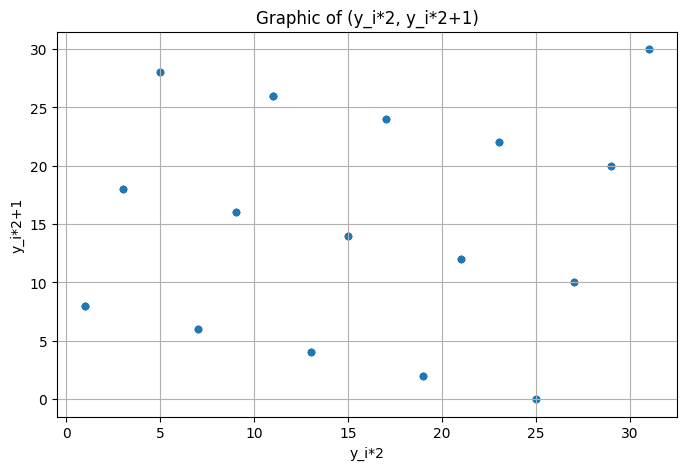

In [ ]:
import matplotlib.pyplot as plt

res = gen_y(100)

gen_y_pairs = []
for i in range(0, len(res)//2):
    gen_y_pairs.append((res[i*2], res[i*2+1]))

x_coords_y, y_coords_y = zip(*gen_y_pairs)

plt.figure(figsize=(8, 5))
plt.scatter(x_coords_y, y_coords_y, s=20)
plt.xlabel("y_i*2")
plt.ylabel("y_i*2+1")
plt.title("Graphic of (y_i*2, y_i*2+1)")
plt.grid(True)
plt.show()

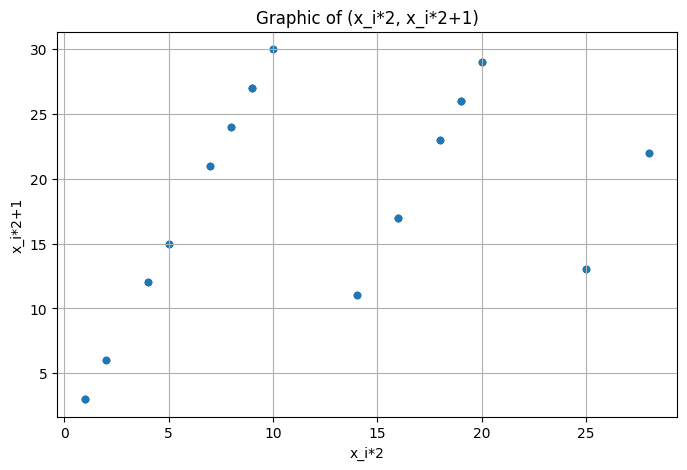

In [ ]:
import matplotlib.pyplot as plt

res = gen_x(100)

gen_y_pairs = []
for i in range(0, len(res)//2):
    gen_y_pairs.append((res[i*2], res[i*2+1]))

x_coords_y, y_coords_y = zip(*gen_y_pairs)

plt.figure(figsize=(8, 5))
plt.scatter(x_coords_y, y_coords_y, s=20)
plt.xlabel("x_i*2")
plt.ylabel("x_i*2+1")
plt.title("Graphic of (x_i*2, x_i*2+1)")
plt.grid(True)
plt.show()

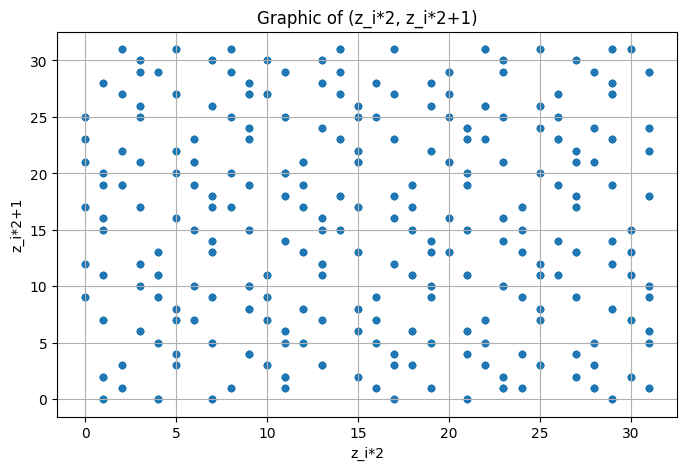

In [ ]:
import matplotlib.pyplot as plt

res = gen_z(1500)

gen_y_pairs = []
for i in range(0, len(res)//2):
    gen_y_pairs.append((res[i*2], res[i*2+1]))

x_coords_y, y_coords_y = zip(*gen_y_pairs)

plt.figure(figsize=(8, 5))
plt.scatter(x_coords_y, y_coords_y, s=20)
plt.xlabel("z_i*2")
plt.ylabel("z_i*2+1")
plt.title("Graphic of (z_i*2, z_i*2+1)")
plt.grid(True)
plt.show()

### **c)**
Resuleto en la carpeta, son cuentas.

### **d)**

Utilice el generador RANDU:
  \begin{align*}
    u_i = au_{i−1} \mod (M) \\
    a = 2^{16} +3, M = 2^{31}
  \end{align*}

para generar puntos aleatorios en el cubo$ [0,M)x[0,M]x[0,M)$, de la forma:

  \begin{align*}
    (u_1,u_2,u_3),(u_4,u_5,u_6),...
  \end{align*}

y estimar el porcentaje de puntos que caen en la esfera centrada en $(M/2,M/2,M/2)$ de radio $M/10$.

Repetir el procedimiento con el generador


  \begin{align*}
    y_i = ay_{i−1} \mod (M) \\
    a = 75, M = 2^{31−1}
  \end{align*}


¿Cuál de los dos generadores estima mejor el valor real?

In [ ]:
randu_a = 2**16+3
randu_M = 2**31
RANGE=20000
def randu():
  x = 1
  lista = [x]
  for i in range(RANGE):
    x = (randu_a * x) % randu_M
    lista.append(x)

  return lista

gen_other_y_a = 7**5
gen_other_y_M = 2**31 - 1
def gen_other_y():
  x = 1
  lista = [x]
  for i in range(RANGE):
    x = (gen_other_y_a * x) % gen_other_y_M
    lista.append(x)

  return lista

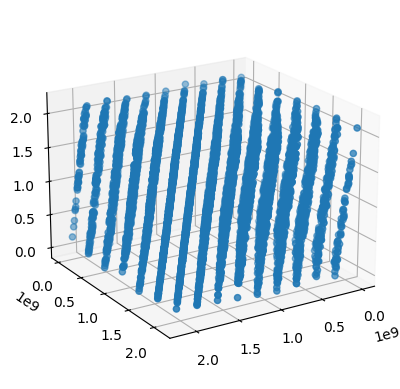

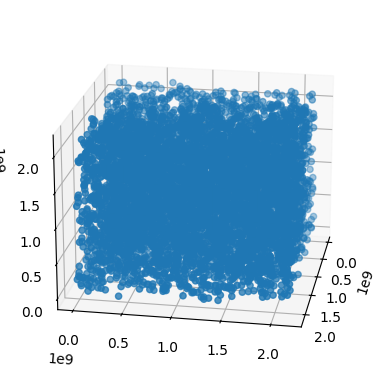

In [ ]:
import matplotlib.pyplot as plt

def gen_graph(lista,y,z):
  xs = lista[0::3]
  ys = lista[1::3]
  zs = lista[2::3]

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(xs, ys, zs)
  ax.view_init(elev=y, azim=z)

  plt.show()

gen_graph(randu(),20,58)
gen_graph(gen_other_y(), 20, 10)

In [ ]:
# SOLO SI TENES GPU EJECUTAR ESTO.

import plotly.graph_objects as go

def gen_graph(lista):
    xs = lista[0::3]
    ys = lista[1::3]
    zs = lista[2::3]

    fig = go.Figure(data=[go.Scatter3d(
        x=xs, y=ys, z=zs,
        mode='markers',
        marker=dict(size=3, color='blue', opacity=0.8)
    )])

    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        title='Gráfico 3D interactivo con Plotly'
    )

    fig.show()


gen_graph(randu())
gen_graph(gen_other_y())

In [ ]:
import math

def estimacion_esfera(lista, M):
  xs = lista[0::3]
  ys = lista[1::3]
  zs = lista[2::3]

  contador = 0
  M_2 = M/2
  for i in range(0, (RANGE+1) // 3):
    if (xs[i] - M_2)**2  + (ys[i] - M_2)**2 + (zs[i] - M_2)**2 <= (M/10)**2:
      contador += 1

  estimacion = contador / ((RANGE+1) /3)
  valor_real = 4 * math.pi / 3000
  print("Estimacion:", estimacion)
  print("Valor real:", valor_real)
  procentaje_accierto = 100 - (abs(estimacion - valor_real)) / valor_real * 100
  print("Porcentaje de accierto:", procentaje_accierto, "%")
  return procentaje_accierto

def comparar_randu_geny():
  print("Estimacion con randu:")
  estimacion_randu = estimacion_esfera(randu(), randu_M)
  print("------------------------------------")
  print("Estimacion con gen_y:")
  estimacion_geny = estimacion_esfera(gen_other_y(), gen_other_y_M)

  print("------------------------------------")
  print("")
  print("------------------------------------")

  print("Con", RANGE, "numeros generados:")
  if(estimacion_randu > estimacion_geny):
    print("Randu es mejor")
  else:
    print("Gen_y es mejor")

In [ ]:
RANGE = 2_000
comparar_randu_geny()

Estimacion con randu:
Estimacion: 0.0074962518740629685
Valor real: 0.0041887902047863905
Porcentaje de accierto: 21.040168937149147 %
------------------------------------
Estimacion con gen_y:
Estimacion: 0.0029985007496251873
Valor real: 0.0041887902047863905
Porcentaje de accierto: 71.58393242514033 %
------------------------------------

------------------------------------
Con 2000 numeros generados:
Gen_y es mejor


In [ ]:
RANGE = 10_000
comparar_randu_geny()

Estimacion con randu:
Estimacion: 0.004199580041995801
Valor real: 0.0041887902047863905
Porcentaje de accierto: 99.74241161094483 %
------------------------------------
Estimacion con gen_y:
Estimacion: 0.004499550044995501
Valor real: 0.0041887902047863905
Porcentaje de accierto: 92.58115529744087 %
------------------------------------

------------------------------------
Con 10000 numeros generados:
Randu es mejor


In [ ]:
RANGE = 100_000
comparar_randu_geny()

Estimacion con randu:
Estimacion: 0.0038099619003809965
Valor real: 0.0041887902047863905
Porcentaje de accierto: 90.95614041561404 %
------------------------------------
Estimacion con gen_y:
Estimacion: 0.0041699583004169965
Valor real: 0.0041887902047863905
Porcentaje de accierto: 99.55042139976656 %
------------------------------------

------------------------------------
Con 100000 numeros generados:
Gen_y es mejor


In [ ]:
RANGE = 10_000_000
comparar_randu_geny()

Estimacion con randu:
Estimacion: 0.003794399620560038
Valor real: 0.0041887902047863905
Porcentaje de accierto: 90.58461835172133 %
------------------------------------
Estimacion con gen_y:
Estimacion: 0.004213799578620042
Valor real: 0.0041887902047863905
Porcentaje de accierto: 99.40294517961118 %
------------------------------------

------------------------------------
Con 10000000 numeros generados:
Gen_y es mejor


Conclución, tengo que con pocos valores randu puede ser mejor, aunque al tener muchos el otro es mejor ya que no tiene el problema de los hiperplanos en $\mathbb{R}^2$.

## **Ejercicio 2**

Se propone el siguiente juego en el cual todas las variables aleatorias que se generan son independientes e idénticamente distribuidas U(0,1): Se simula la variable aleatoria U. Si U < 1/2, se suman dos nuevos números aleatorios W1 +W2. Pero si U ≥ 1/2, se suman tres números aleatorios. El resultado de
la suma, en cualquiera de los casos, es una variable aleatoria X. Se gana en el juego si X ≥ 1.


### **a)**
Resuelto en papel. Da 2/3.

### **b)**

Implementar un algoritmo en computadora que estime la probabilidad de ganar, esto es, la fracción de veces que se gana en n realizaciones del juego.

In [ ]:
import random

def juego_ej2():
  "Retorna True si ganas y False si perdes."
  if random.random() < 0.5:
    return (random.random() + random.random()) >= 1
  else:
    return (random.random() + random.random() + random.random()) >= 1

In [ ]:
def jugamos_e2_y_contamos(N):
  count = 0
  for _ in range(0,N):
    if(juego_ej2()):
      count += 1
  return count

In [ ]:
import pandas as pd

n_values = [100, 1_000, 10_000, 100_000, 1_000_000]
result = map(lambda x: jugamos_e2_y_contamos(x)/x, n_values)

datos = {
    'N': n_values,
    'P[X ≥ 1]': result,
}

print(pd.DataFrame(datos))
print("\n Recordar que el valor esperado era 2/3=",2/3)

         N  P[X ≥ 1]
0      100  0.680000
1     1000  0.655000
2    10000  0.658600
3   100000  0.666200
4  1000000  0.667319

 Recordar que el valor esperado era 2/3= 0.6666666666666666


## **Ejercicio 3**

Las máquinas tragamonedas usualmente generan un premio cuando hay un acierto. Supongamos que se genera el acierto con el siguiente esquema: se genera un número aleatorio, y

- i) si es menor a un tercio, se suman dos nuevos números aleatorios.
- ii) si es mayor o igual a un tercio, se suman tres números aleatorios.

Si el resultado de la suma es menor o igual a 2, se genera un acierto.


### **a)**
¿Cuál es la probabilidad de acertar?. En papel. Dío 8/9.



### **b)**
Implementar un algoritmo en computadora que estime la probabilidad de acertar, esto es, la fracción de veces que se acierta en n realizaciones del juego.

In [ ]:
import random

def juego_ej3():
  "Retorna True si ganas y False si perdes."
  if random.random() < (1/3):
    return (random.random() + random.random()) <= 2
  else:
    return (random.random() + random.random() + random.random()) <= 2

def jugamos_e3_y_contamos(N):
  count = 0
  for _ in range(0,N):
    if(juego_ej3()):
      count += 1
  return count

In [ ]:
import pandas as pd

n_values = [100, 1_000, 10_000, 100_000, 1_000_000]
result = map(lambda x: jugamos_e3_y_contamos(x)/x, n_values)

datos = {
    'N': n_values,
    'P[X ≥ 1]': result,
}

print(pd.DataFrame(datos))
print("\n Recordar que el valor esperado era 8/9=",8/9)

         N  P[X ≥ 1]
0      100  0.930000
1     1000  0.892000
2    10000  0.890600
3   100000  0.890350
4  1000000  0.889016

 Recordar que el valor esperado era 8/9= 0.8888888888888888


## **Ejercicio 4**

Un supermercado posee 3 cajas. Por una cuestión de ubicación, el 40% de los clientes eligen la caja 1 para pagar, el 32% la caja 2, y el 28% la caja 3. El tiempo que espera una persona para ser atendida en cada caja distribuye exponencial con medias de 3, 4 y 5 minutos respectivamente.



### **a)**
¿Cuál es la probabilidad de que un cliente espere menos de 4 minutos para ser atendido?

Me dío $0.651027 ...$

### **b)**
Si el cliente tuvo que esperar más de 4 minutos. ¿Cuál es la probabilidad de que el cliente haya elegido
cada una de las cajas?

Me dío, para cada caja:
- Caja1: $0.30214 ...$
- Caja2: $0.33733 ...$
- Caja2: $0.36052 ...$

### **c)**
Simule el problema y estime las probabilidades anteriores con 1000 iteraciones.

In [ ]:
import numpy as np

def exponencial(lamda):
  U = 1 - np.random.uniform(0, 1)
  return -np.log(U) / lamda

lambda_por_caja_del_tiempo_de_espera = [1/3,1/4,1/5]

def supermercado():
  "Va a retornar el tiempo que tardo"
  caja_elegida = 0
  u = np.random.uniform(0, 1)
  if u <= 0.4:
    caja_elegida = 1
  elif u <= 0.72:
    caja_elegida = 2
  else:
    caja_elegida = 3

  tiempo_de_espera = exponencial(lambda_por_caja_del_tiempo_de_espera[caja_elegida-1])
  return (tiempo_de_espera, caja_elegida)

In [ ]:
# parte a)
N = 1_000_000
prob_cliente_espera_menos_de_4 = 0
for _ in range(0,N):
  if(supermercado()[0] < 4):
    prob_cliente_espera_menos_de_4 += 1

print("P[X < 4]=", prob_cliente_espera_menos_de_4/N)

P[X < 4]= 0.650995


In [ ]:
#parte b)
N = 1000

resultados_espera_mas_de_4 = []
while(len(resultados_espera_mas_de_4) < N):
  tiempo, por_caja = supermercado()
  if(tiempo >= 4 ):
    resultados_espera_mas_de_4.append(por_caja)

def prob_dado_espero_mas_4_por_caja(caja):
  prob_cliente_espera_mas_de_4 = 0
  for resultado in resultados_espera_mas_de_4:
    if(resultado == caja):
      prob_cliente_espera_mas_de_4 += 1

  print("P['paso por la caja",caja,"'| X > 4]=", prob_cliente_espera_mas_de_4/N)

prob_dado_espero_mas_4_por_caja(1)
prob_dado_espero_mas_4_por_caja(2)
prob_dado_espero_mas_4_por_caja(3)

P['paso por la caja 1 '| X > 4]= 0.305
P['paso por la caja 2 '| X > 4]= 0.342
P['paso por la caja 3 '| X > 4]= 0.353


## **Ejercicio 5**

Calcule exactamente el valor de las siguientes integrales. Mediante una simulación de Monte Carlo con n = 1000,5000,10000 iteraciones, calcule a su vez un valor aproximado y compare con el valor exacto.


In [ ]:
import random
import math
ln = math.log
exp = math.exp
ITERACIONES = [100, 1_000, 10_000, 100_000, 1_000_000]

def print_ej(ej, valor_real, funcion_montecarlo):
  print("------------------------------------")
  print(f"{ej})")
  for n in ITERACIONES:
    print(f"Se ejecutaron {n} iteraciones y Monte Carlo retorno {funcion_montecarlo(n)}")
  print(f"Valor exacto: {valor_real}")
  print("------------------------------------")

In [ ]:
def MonteCarlo_0_1(g, N):
  integral = 0
  for _ in range(N):
    integral += g(random.random())
  return integral / N

def MonteCarlo_0_1_2variables(g, N):
  integral = 0
  for _ in range(N):
    integral += g(random.random(), random.random())
  return integral / N

def MonteCarlo_a_b(g, a, b, N):
  integral = 0
  for _ in range(N):
    integral += g(a + (b-a) * random.random())
  return (integral*(b-a)) / N

def MonteCarlo_0_inf(g, N):
  integral = 0
  for _ in range(N):
    u = random.random()
    integral += g((1/u) -1)* 1/(u**2)
  return integral / N

def MonteCarlo_0_inf_2variables(g, N):
  integral = 0
  for _ in range(N):
    u = random.random()
    v = random.random()
    integral += g( (1/u) -1, (1/v) -1 ) * 1/(u**2) * 1/(v**2)
  return integral / N

def MonteCarlo_inf_inf(g, N):
  integral = 0
  for _ in range(N):
    u = random.random()
    integral += g( ln((1/u)-1) )*((1+exp(u))**2 / exp(u))
  return integral / N

### **a)**
$\int_0^1 (1 - x^2)^{\frac{3}{2}} \,dx$

In [ ]:
#a)

def g_a(x):
  return (1 - x**2)**(3/2)

print_ej("a", 0.58904, lambda n: MonteCarlo_0_1(g_a, n))

------------------------------------
a)
Se ejecutaron 100 iteraciones y Monte Carlo retorno 0.5581233879178388
Se ejecutaron 1000 iteraciones y Monte Carlo retorno 0.6033952757651405
Se ejecutaron 10000 iteraciones y Monte Carlo retorno 0.590938482910327
Se ejecutaron 100000 iteraciones y Monte Carlo retorno 0.5904972213881691
Se ejecutaron 1000000 iteraciones y Monte Carlo retorno 0.5887118400624513
Valor exacto: 0.58904
------------------------------------


### **b)**
$\int_2^3 \frac{x}{x^2 - 1} \,dx$


In [ ]:
#b)
def g_b(x):
  return x / (x**2 - 1)

print_ej("b", (1/2)*(ln(8)-ln(3)), lambda n: MonteCarlo_a_b(g_b,2,3,n))

------------------------------------
b)
Se ejecutaron 100 iteraciones y Monte Carlo retorno 0.491778861436358
Se ejecutaron 1000 iteraciones y Monte Carlo retorno 0.4858632615757707
Se ejecutaron 10000 iteraciones y Monte Carlo retorno 0.49063647434595603
Se ejecutaron 100000 iteraciones y Monte Carlo retorno 0.490200971485085
Se ejecutaron 1000000 iteraciones y Monte Carlo retorno 0.49025969928752583
Valor exacto: 0.490414626505863
------------------------------------


### **c)**
$\int_0^\infty x (1 + x^2)^{-2} \,dx$

In [ ]:
#c)

def g_c(x):
  return x*(1+x**2)**(-2)

print_ej("c", 1/2, lambda n: MonteCarlo_0_inf(g_c,n))

------------------------------------
c)
Se ejecutaron 100 iteraciones y Monte Carlo retorno 0.4878694050167523
Se ejecutaron 1000 iteraciones y Monte Carlo retorno 0.5044372527775286
Se ejecutaron 10000 iteraciones y Monte Carlo retorno 0.4984639752027381
Se ejecutaron 100000 iteraciones y Monte Carlo retorno 0.49997549407255937
Se ejecutaron 1000000 iteraciones y Monte Carlo retorno 0.500957647994767
Valor exacto: 0.5
------------------------------------



### **d)**
$\int_{-\infty}^{\infty} e^{-x^2} \,dx$

In [ ]:
#d)

def g_d(x):
  return exp(-(x**2))

print_ej("d", math.sqrt(math.pi), lambda n: MonteCarlo_inf_inf(g_d,n))

------------------------------------
d)
Se ejecutaron 100 iteraciones y Monte Carlo retorno 1.4683292938778956
Se ejecutaron 1000 iteraciones y Monte Carlo retorno 1.810910262979763
Se ejecutaron 10000 iteraciones y Monte Carlo retorno 1.6743783262491794
Se ejecutaron 100000 iteraciones y Monte Carlo retorno 1.7118656246207815
Se ejecutaron 1000000 iteraciones y Monte Carlo retorno 1.7042662461308893
Valor exacto: 1.7724538509055159
------------------------------------


Notar que ademas $e^{-x^2}$ es par por lo tanto tengo que $\int_{-\infty}^{\infty} e^{-x^2} \,dx = 2 \int_{0}^{\infty} e^{-x^2} \,dx = \int_{0}^{\infty} 2e^{-x^2} \,dx$

Asi que tambien lo podemos resolver así:

In [ ]:
def g_d(x):
  return 2*exp(-(x**2))

print_ej("d", math.sqrt(math.pi), lambda n: MonteCarlo_0_inf(g_d,n))

------------------------------------
d)
Se ejecutaron 100 iteraciones y Monte Carlo retorno 1.7437890987177271
Se ejecutaron 1000 iteraciones y Monte Carlo retorno 1.7622277856184814
Se ejecutaron 10000 iteraciones y Monte Carlo retorno 1.7697258398755922
Se ejecutaron 100000 iteraciones y Monte Carlo retorno 1.7670229772466761
Se ejecutaron 1000000 iteraciones y Monte Carlo retorno 1.7718654098756654
Valor exacto: 1.7724538509055159
------------------------------------


### **e)**
$\int_0^1 \left[ \int_0^1 e^{(x+y)^2} \,dx \right] dy$

In [ ]:
#e)

def g_e(x,y):
  return exp((x+y)**2)

print_ej("d", "????", lambda n: MonteCarlo_0_1_2variables(g_e,n))

------------------------------------
d)
Se ejecutaron 100 iteraciones y Monte Carlo retorno 5.9584760417295
Se ejecutaron 1000 iteraciones y Monte Carlo retorno 4.956518333369117
Se ejecutaron 10000 iteraciones y Monte Carlo retorno 4.868485201419643
Se ejecutaron 100000 iteraciones y Monte Carlo retorno 4.898350810902249
Se ejecutaron 1000000 iteraciones y Monte Carlo retorno 4.894921636981583
Valor exacto: ????
------------------------------------


### **f)**
$\int_0^\infty \left[ \int_0^x e^{-(x+y)} \,dy \right] dx$

Notar que esto es igual a:

$\int_0^\infty \int_0^\infty e^{-(x+y)}I_{(0,x)}(y) \,dy dx$

In [ ]:
#f

def g_f(x,y):
  if(y > x):
    return 0
  return exp(-(x+y))

print_ej("f", "1/2", lambda n: MonteCarlo_0_inf_2variables(g_f,n))

------------------------------------
f)
Se ejecutaron 100 iteraciones y Monte Carlo retorno 0.5976705034536631
Se ejecutaron 1000 iteraciones y Monte Carlo retorno 0.5480775164623104
Se ejecutaron 10000 iteraciones y Monte Carlo retorno 0.49963373492444907
Se ejecutaron 100000 iteraciones y Monte Carlo retorno 0.4984241105997841
Se ejecutaron 1000000 iteraciones y Monte Carlo retorno 0.49871351132655267
Valor exacto: 1/2
------------------------------------


## **Ejercicio 6**
Es posible aproximar el valor de $π$ calculando el área de un círculo de radio 1 centrado en 0.

Para eso, se necesitan generar N puntos aleatorios en la caja $[−1,1]×[−1,1]$ y contar la cantidad de veces que los mismos caen dentro del círculo. El cociente entre este número y N, multiplicado por 4 (el área del cuadrado donde está contenido el círculo) es una aproximación de $π$.

Completar la siguiente tabla con los valores obtenidos para distintos N y compararlos con `numpy.pi`.

Para ello primero analicemos lo que nececitamos. Esto es:

$\pi = \int_{-1}^1  \int_{-1}^1 I_{(x^2+y^2<1)}(x,y) \,dx dx = 4\int_{0}^1  \int_{0}^1 I_{(x^2+y^2<1)}(x,y) \,dx dx$


In [ ]:
import random

def MonteCarlo_PI(N):
  contador = 0
  for _ in range(N):
    if(random.random()**2 + random.random()**2 < 1):
      contador += 1
  return (contador / N)*4

In [ ]:
import math
print("Estimando pi:", math.pi,"con Monte Carlo:")

for n in [1_000, 10_000, 100_000]:
  print(f"- {n} iteraciones y retorno {MonteCarlo_PI(n)}")

Estimando pi: 3.141592653589793 con Monte Carlo:
- 1000 iteraciones y retorno 3.168
- 10000 iteraciones y retorno 3.1308
- 100000 iteraciones y retorno 3.14088


## **Ejercicio 7**
Para $U_1,U_2,...$ variables aleatorias uniformemente distribuídas en el intervalo $(0,1)$, se define:

$N = Mínimo(\{n :\sum_{i=1}^{n}U_i > 1\})$

Es decir, N es igual a la cantidad de números aleatorios que deben sumarse para exceder a 1.

### **a)**
Estimar $E[N]$ generando n valores de N con $n=\{100,1000,10000, 100000, 1000000\}$.

In [ ]:
import random

def variable_aleatoria_N():
  cantidad_uniformes_ejecutadas = 0
  N = 0
  while(N <= 1):
    N += random.random()
    cantidad_uniformes_ejecutadas += 1
  return cantidad_uniformes_ejecutadas

In [ ]:
def MonteCarlo_de_N(iteraciones):
  acumulador = 0
  for _ in range(iteraciones):
    acumulador += variable_aleatoria_N()
  return acumulador / iteraciones

In [ ]:
print("Estimando E[N]:")
for n in [100, 1_000, 10_000, 100_000, 1_000_000]:
  print(f"- {n} iteraciones y retorno {MonteCarlo_de_N(n)}")

print("El valor esperado seria e=", math.e)

Estimando E[N]:
- 100 iteraciones y retorno 2.82
- 1000 iteraciones y retorno 2.717
- 10000 iteraciones y retorno 2.7343
- 100000 iteraciones y retorno 2.71705
- 1000000 iteraciones y retorno 2.718955
El valor esperado seria e= 2.718281828459045


### **b)**

Me dío que es $e$.

## **Ejercicio 8**
Para $U_1,U_2,...$ números aleatorios, se define:

$M = Máximo(\{n :\prod_{i=1}^{n}U_i > e^{-3}\})$

Mediante n simulaciones determinar:

### **a)**

Estimar $E[M]$ generando n valores de M con $n=\{100,1000,10000, 100000, 1000000\}$.

In [ ]:
import math
import random

e_menos_3 = math.exp(-3)

def variable_aleatoria_M():
  cantidad_uniformes_ejecutadas = 0
  N = 1
  while(N >= e_menos_3):
    N *= random.random()
    cantidad_uniformes_ejecutadas += 1
  return cantidad_uniformes_ejecutadas - 1

In [ ]:
def MonteCarlo_de_M(iteraciones):
  acumulador = 0
  for _ in range(iteraciones):
    acumulador += variable_aleatoria_M()
  return acumulador / iteraciones

In [ ]:
print("Estimando E[M]:")
for n in [100, 1_000, 10_000, 100_000, 1_000_000]:
  print(f"- {n} iteraciones y retorno {MonteCarlo_de_M(n)}")

Estimando E[M]:
- 100 iteraciones y retorno 2.58
- 1000 iteraciones y retorno 2.957
- 10000 iteraciones y retorno 3.0375
- 100000 iteraciones y retorno 3.00282
- 1000000 iteraciones y retorno 2.999081


### **b)**

$P(N = i)$ para $i = 0,1,2,3,4,5,6$ usando $n = 1000000$.

In [ ]:
def MonteCarlo_de_prob_M_es_i(i,iteraciones):
  contador = 0
  for _ in range(iteraciones):
    if(variable_aleatoria_M() == i):
      contador += 1
  return contador / iteraciones

In [ ]:
n = 1_000_000
print(f"Estimando P(N = i) con n = {n}:")
for i in range(7):
  print(f"- P(N = {i}) ~ {MonteCarlo_de_prob_M_es_i(i,n)}")

Estimando P(N = i) con n = 1000000:
- P(N = 0) ~ 0.049449
- P(N = 1) ~ 0.149167
- P(N = 2) ~ 0.224998
- P(N = 3) ~ 0.224619
- P(N = 4) ~ 0.1678
- P(N = 5) ~ 0.101045
- P(N = 6) ~ 0.050585


## **Ejercicio 9**

Un juego consiste en dos pasos. En el primer paso se tira un dado convencional. Si sale 1 o 6 tira un nuevo dado y se le otorga al jugador como puntaje el doble del resultado obtenido en esta nueva tirada; pero si sale 2, 3, 4 o 5 en la primer tirada, el jugador debería tirar dos nuevos dados, y recibiría como puntaje la suma de los dados. Si el puntaje del jugador excede los 6 puntos entonces gana.

### **a)**

Realizar un cálculo teórico de la probabilidad de que un jugador gane.

Me dió $P("ganar") = 5 / 9 = 0.55555555555$

### **b)**
Estime la probabilidad de que un jugador gane mediante una simulación.

In [ ]:
import random

def dado():
  u = random.random()
  return int(u*6 + 1)

def simulación_juego():
  """Retorna True si ganó y False si perdió."""
  u = dado()
  if(u == 1 or u == 6):
    return (2*dado()) > 6
  else:
    return (dado() + dado()) > 6

In [ ]:
def MonteCarlo(iteraciones):
  contador = 0
  for _ in range(iteraciones):
    if(simulación_juego()):
      contador += 1
  return contador / iteraciones

In [ ]:
print("Estimando P(ganar):")
for n in [100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000]:
  print(f"- {n} iteraciones y P('ganar')={MonteCarlo(n)}")

print("\nLa probabilidad exacta es de 5/9", 5/9)

Estimando P(ganar):
- 100 iteraciones y P('ganar')=0.48
- 1000 iteraciones y P('ganar')=0.555
- 10000 iteraciones y P('ganar')=0.564
- 100000 iteraciones y P('ganar')=0.55496
- 1000000 iteraciones y P('ganar')=0.556031
- 10000000 iteraciones y P('ganar')=0.5556531

La probabilidad exacta es de 5/9 0.5555555555555556


------------------------------------

# Auxiliar

Calcular $g(x) = \frac{1}{x^2\ln(x+1)}$  $\int_1^{∞} g(x)dx$
si hacemos el cambio de variable  $y = 1 - \frac{1}{x}$ nos queda que $\int_1^{∞} g(x)dx = \int_0^1 g(\frac{1}{1-y})\frac{1}{(1-y)^2}dy $

In [ ]:
import random
import math

def MonteCarlo_1_inf(g, N):
  count = 0
  for _ in range(N):
    u = random.random()
    count += g(1/(1-u))*(1/(1-u)**2)
  return count / N

def g(x):
  return 1/(x**2*math.log(x+1))

print("Estimación:")
print("Con N = 1_000, tengo que la estimacion da", MonteCarlo_1_inf(g,1_000))
print("Con N = 10_000, tengo que la estimacion da", MonteCarlo_1_inf(g,10_000))
print("Con N = 100_000, tengo que la estimacion da", MonteCarlo_1_inf(g,100_000))
print("Con N = 1_000_000, tengo que la estimacion da", MonteCarlo_1_inf(g,1_000_000))


Estimación:
Con N = 1_000, tengo que la estimacion da 0.8867299365735593
Con N = 10_000, tengo que la estimacion da 0.8958680603127003
Con N = 100_000, tengo que la estimacion da 0.8919491285663844
Con N = 1_000_000, tengo que la estimacion da 0.8924959199918755


In [ ]:
Considerar un juego entre dos personas donde A sortea un valor de una uniforme U ∼
U(0, 1) y B sortea un valor de una uniforme V ∼ U(0, 1). U y V son independientes. Si U > 0.5 y
V < 0.5 entonces gana A. Si U < 0.5 y V > 0.5 entonces gana B. En cualquier otro caso se repite la
jugada con dos valores de U y V independientes de la jugada anterior, hasta que haya un ganador.

In [ ]:
from random import random

def simulacion():
  jugadas = 0
  while True:
    u = random()
    v = random()
    jugadas += 1
    if u > 0.5 and v < 0.5:
      return "A", jugadas
    elif u < 0.5 and v > 0.5:
      return "B", jugadas

for n in [1_000, 10_000, 100_000, 1_000_000]:
  contador_A_gana_primer_jugada = 0
  contador_A_gana_segunda_jugada = 0
  for _ in range(n):
    ganador, jugadas = simulacion()
    if ganador == "A" and jugadas == 1:
      contador_A_gana_primer_jugada += 1
    elif ganador == "A" and jugadas == 2:
      contador_A_gana_segunda_jugada += 1

  prob_A_gana_primer_jugada = contador_A_gana_primer_jugada / n
  prob_A_gana_segunda_jugada = contador_A_gana_segunda_jugada / n
  print(f"Con {n} iteraciones, P('A gana en la primer juagada o en la segunda)=",prob_A_gana_primer_jugada + prob_A_gana_segunda_jugada )


Con 1000 iteraciones, P('A gana en la primer juagada o en la segunda)= 0.371
Con 10000 iteraciones, P('A gana en la primer juagada o en la segunda)= 0.37370000000000003
Con 100000 iteraciones, P('A gana en la primer juagada o en la segunda)= 0.37492
Con 1000000 iteraciones, P('A gana en la primer juagada o en la segunda)= 0.375111


Usar montecarlo para las siguientes integrles:

$a) \int_{-3}^{3} \frac{x}{x - e^x} \, dx$

$b) \int_{-1}^{\infty} x^3 e^{-x^3} \, dx$

In [ ]:
from random import random
from math import exp

def f_a(x):
  return x / (x - exp(x))

def monte_carlo_a(N):
  count = 0
  for _ in range(N):
    u = random()
    count += f_a(6*u-3)
  return (count*6)/N

def f_b(x):
  return x**3 * exp(-(x**3))

def monte_carlo_b(N):
  count = 0
  for _ in range(N):
    u = random()
    count += f_b((1/u)-2)*(1/u**2)
  return (count)/N


print("Estimaciónes de a):")
for n in [1_000, 10_000, 100_000, 1_000_000]:
  print(f"La integral con {n} iteraciones da {monte_carlo_a(n)}")

print("\nEstimaciónes de b):")
for n in [1_000, 10_000, 100_000, 1_000_000]:
  print(f"La integralcon {n} iteraciones da {monte_carlo_b(n)}")


Estimaciónes de a):
La integral con 1000 iteraciones da 1.0083193594492568
La integral con 10000 iteraciones da 1.1495172549804635
La integral con 100000 iteraciones da 1.106355909655464
La integral con 1000000 iteraciones da 1.1036668969869945

Estimaciónes de b):
La integralcon 1000 iteraciones da -0.1936888474769171
La integralcon 10000 iteraciones da -0.16190582499929856
La integralcon 100000 iteraciones da -0.16828176653915056
La integralcon 1000000 iteraciones da -0.15962507244515584


In [ ]:
from random import random
from math import exp

def f_a(x):
    return x / (x - exp(x))

def monte_carlo_a(N):
    total = 0
    for _ in range(N):
        u = random()
        x = 6*u - 3
        total += f_a(x)
    return (total * 6) / N

def f_b(x):
    return x**3 * exp(-x**3)

def monte_carlo_b(N):
    total = 0
    for _ in range(N):
        u = random()
        x = (1/u) - 2
        total += f_b(x) * (1 / u**2)
    return total / N

print("Estimaciones de a):")
for n in [1_000, 10_000, 100_000, 1_000_000]:
    print(f"La integral con {n} iteraciones da {monte_carlo_a(n)}")

print("\nEstimaciones de b):")
for n in [1_000, 10_000, 100_000, 1_000_000]:
    print(f"La integral con {n} iteraciones da {monte_carlo_b(n)}")


Estimaciones de a):
La integral con 1000 iteraciones da 1.1022597705429216
La integral con 10000 iteraciones da 1.110092969385446
La integral con 100000 iteraciones da 1.103364358317085
La integral con 1000000 iteraciones da 1.104534914639554

Estimaciones de b):
La integral con 1000 iteraciones da -0.15802716277487205
La integral con 10000 iteraciones da -0.15817704750583347
La integral con 100000 iteraciones da -0.16379720944499443
La integral con 1000000 iteraciones da -0.16159294445953493


Considerar un juego entre dos personas donde A sortea un valor de una uniforme U ∼
U(0, 1) y B sortea un valor de una uniforme V ∼ U(0, 1). U y V son independientes. Si el maximo ´
entre U y V es mayor que 0.6, entonces gana A. De lo contrario gana B.

In [ ]:
from random import random

def simulacion():
  U = random()
  V = random()
  if(max(U,V) > 0.6):
    return "A"
  else:
    return "B"

for n in [1_000, 10_000, 100_000, 1_000_000]:
  contador_gano_A = 0
  for _ in range(n):
    if(simulacion() == "A"):

      contador_gano_A += 1
  print(f"Con {n} iteraciones, P('A gana')=",contador_gano_A / n)

Con 1000 iteraciones, P('A gana')= 0.622
Con 10000 iteraciones, P('A gana')= 0.6432
Con 100000 iteraciones, P('A gana')= 0.64111
Con 1000000 iteraciones, P('A gana')= 0.640049


## Parcial 2017

Sea:

$$
y_{i+1} = 5y_i + c \mod(17)
$$

con semilla $y_o=2x$

a) Determinar su periodo si $c=0$.

In [28]:
N = 100
def generador_congruencial( semilla=2):
  res = []
  y = semilla
  for _ in range(N):
    res.append(y)
    y = (5*y) % 17
  return res

random_numbers = generador_congruencial()

print(random_numbers[0:16])
print(random_numbers[16:16+16])
print("Periodo:", len(random_numbers[0:16]))

[2, 10, 16, 12, 9, 11, 4, 3, 15, 7, 1, 5, 8, 6, 13, 14]
[2, 10, 16, 12, 9, 11, 4, 3, 15, 7, 1, 5, 8, 6, 13, 14]
Periodo: 16


b) Indicar para que valores de $c$ entre 0 y 16 se cumple que  el perido de $y$ es 17 o maximo.

Recordar:

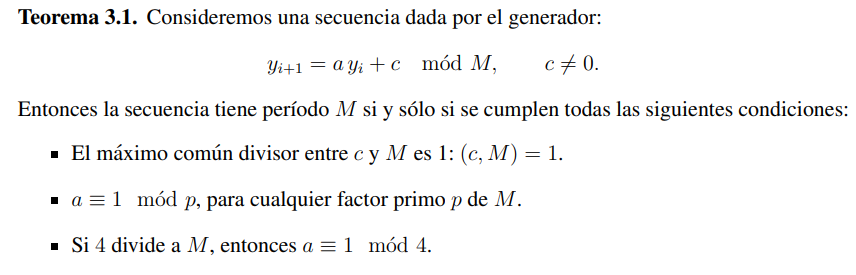

La definición de máximo común divisor (MCD) es:

El máximo común divisor de dos o más números enteros es el mayor número entero positivo que divide exactamente a todos ellos (es decir, sin dejar residuo).

$a≡1 \mod p$

es lo mismo que

$a \mod p = 1$

o

$p∣(a−1)\ (es\ decir\ p\ divide\ a - 1)$

Por lo tanto, tenemos que si $c∈\{0,...,16\}$, y como $M=17$ es primo todos exepto el 0, cumplen la primera condición.

Luego como $M$ es primo su factor primo es $17$ y como $ 5 \mod 17  = 5$ tengo que le segunda condición no vale nunca por lo tanto ningun $c∈\{0,...,16\}$ vale.

In [39]:
import math

for c in range(17):
    print(c,  math.gcd(c,17), math.gcd(c,17) == 1)

0 17 False
1 1 True
2 1 True
3 1 True
4 1 True
5 1 True
6 1 True
7 1 True
8 1 True
9 1 True
10 1 True
11 1 True
12 1 True
13 1 True
14 1 True
15 1 True
16 1 True


In [43]:
N = 100
def generador_congruencial(c, semilla=2):
  res = []
  y = semilla
  for _ in range(N):
    res.append(y)
    y = (5*y) % 17 + c
  return res

for c in range(1,3):
  random_numbers = generador_congruencial(c)
  # if(random_numbers[0:16] == random_numbers[16:16+16]):
  print("----------------------")
  print("c=",c)
  print("Periodo:", len(random_numbers[0:16]))
  print(random_numbers[0:16])
  print(random_numbers[16:16+16])
  print("----------------------")

for c in range(3,17):
  random_numbers = generador_congruencial(c)
  # if(random_numbers[0:16] == random_numbers[16:16+16]):
  print("----------------------")
  print("c=",c)
  print("Periodo:", len(random_numbers[0:17]))
  print(random_numbers[0:17])
  print(random_numbers[17:17*2])
  print(random_numbers[17*2:17*3])

  print("----------------------")


----------------------
c= 1
Periodo: 16
[2, 11, 5, 9, 12, 10, 17, 1, 6, 14, 3, 16, 13, 15, 8, 7]
[2, 11, 5, 9, 12, 10, 17, 1, 6, 14, 3, 16, 13, 15, 8, 7]
----------------------
----------------------
c= 2
Periodo: 16
[2, 12, 11, 6, 15, 9, 13, 16, 14, 4, 5, 10, 18, 7, 3, 17]
[2, 12, 11, 6, 15, 9, 13, 16, 14, 4, 5, 10, 18, 7, 3, 17]
----------------------
----------------------
c= 3
Periodo: 17
[2, 13, 17, 3, 18, 8, 9, 14, 5, 11, 7, 4, 6, 16, 15, 10, 19]
[13, 17, 3, 18, 8, 9, 14, 5, 11, 7, 4, 6, 16, 15, 10, 19, 13]
[17, 3, 18, 8, 9, 14, 5, 11, 7, 4, 6, 16, 15, 10, 19, 13, 17]
----------------------
----------------------
c= 4
Periodo: 17
[2, 14, 6, 17, 4, 7, 5, 12, 13, 18, 9, 15, 11, 8, 10, 20, 19]
[14, 6, 17, 4, 7, 5, 12, 13, 18, 9, 15, 11, 8, 10, 20, 19, 14]
[6, 17, 4, 7, 5, 12, 13, 18, 9, 15, 11, 8, 10, 20, 19, 14, 6]
----------------------
----------------------
c= 5
Periodo: 17
[2, 15, 12, 14, 7, 6, 18, 10, 21, 8, 11, 9, 16, 17, 5, 13, 19]
[15, 12, 14, 7, 6, 18, 10, 21, 8, 11, 9, 16

# Extra de latex

$$
\begin{array}{|c|c|}
\hline
Fruta & Cantidad \\
\hline
Manzana & 4 \\
Naranja & 10 \\
Plátano & 3 \\
\hline
\end{array}
$$

$$
\begin{array}{|c|c|c|}
\hline
\textbf{Nombre} & \textbf{Edad} & \textbf{País} \\
\hline
Ana & 25 & Argentina \\
Luis & 30 & México \\
Sofía & 28 & Chile \\
\hline
\end{array}
$$
